 一、前言

本章中，我们将学习到如下内容：从各种不同的来源中构造算法所需的数据；两种不同的聚类算法；更多有关距离度量（distance metrics）的知识；简单的图形可视化代码，用以观察所生成的群组；最后，我们还会学习如何将异常复杂的数据集投影到二维空间中。


聚类时常被用于数据量很大（data-intensive）的应用中。跟踪消费者购买行为的零售商们，除了利用常规的消费者统计消息外，还可以利用这些信息自动检测出具有相似购买模式的消费者群体。年龄和收入都相仿的人也许会有迥然不同的着装风格，但是通过使用聚类算法，我们就可以找到“时装岛屿”，并据此开发出相应的零售或市场策略。聚类在计量生物学领域里也有大量的运用，我们用它来寻找具有相似行为的基因组，相应的研究结果可以表明，这些基因组中的基因会以同样的方式响应外界的活动，或者表明它们是相同生化通路中的一部分。


二、监督学习和无监督学习

（1）监督学习

利用样本输入和期望输出来学习如何预测的技术被称为监督学习法（supervised learning methods）。常用的监督学习法包括：神经网络、决策树、向量支持机以及贝叶斯过滤。采用这些方法的应用程序，会通过检查一组输入和期望的输出来进行“学习”。当我们想要利用这些方法中的任何一种来提取信息时，我们可以传入一组输入，然后期望应用程序能够根据其此前学到的知识来产生一个输出。


（2）无监督学习

聚类是无监督学习（unsupervised learning）的一个例子。与神经网络或决策树不同，无监督学习算法不是利用带有正确答案的样本数据进行“训练”。它们的目的是要在一组数据中找寻某种结构，而这些数据本身并不是我们要找的答案。在前面提到的时装的例子中，聚类的结果不会告诉零售商每一位顾客可能会买什么，也不会预测新来的顾客适合哪种时尚。聚类算法的目标是采集数据，然后从中找出不同的群组。其他无监督学习的例子还包括非负矩阵因式分解（non-negative matrix factorization）和自组织映射（self-organizing maps）。


三、对订阅源中的单词进行计数

几乎所有的博客都可以在线阅读，或者通过RSS订阅源进行阅读。RSS订阅源是一个包含博客及其所有文章条目信息的简单的XML文档。为了给每个博客中的单词计数，首先第一步就是要解析这些订阅源。所幸的是，有一个非常不错的程序能够完成这项工作，它就是Universal Feed Parser。从Python的包或者使用pip安装feedparser包即可。


有了Universal Feed Parser，我们就可以很轻松地从任何RSS或Atom订阅源中得到标题、链接和文章的条目了。下一步，我们来编写一个从订阅源中提取所有单词的函数。新建一个feedvector.py，将下列代码加入。

In [1]:

import feedparser  
import re  


# 返回一个RSS订阅源的标题和包含单词计数情况的字典  
def getwordcounts(url):  
    # 解析订阅源  
    d = feedparser.parse(url)  
    wc = {}  

    # 循环遍历所有的文章条目  
    for e in d.entries:  
        if 'summary' in e:  
            summary = e.summary  
        else:  
            summary = e.description  

        # 提取一个单词列表  
        words = getwords(e.title+''+summary)  
        for word in words:  
            wc.setdefault(word, 0)  
            wc[word] += 1  
    return d.feed.title, wc 

def getwords(html):  
    # 去除所有HTML标记  
    txt = re.compile(r'<[^>]+>').sub('',html)  

    # 利用所有非字母字符拆分出单词  
    words = re.compile(r'[^A-Z^a-z]+').split(txt)  

    # 转化成小写形式  
    return [word.lower() for word in words if word !=''] 

apcount = { }
wordcounts = { }
feedlist = [line for line in open('feedlist.txt')]
for feedurl in feedlist:
    title , wc = getwordcounts(feedurl)
    wordcounts[title] = wc
    for word,count in wc.items():
        apcount.setdefault(word,0)
        if count>1:
            apcount[word] += 1
            
wordlist = []  
for w,bc in apcount.items():  
    frac = float(bc)/len(feedlist)  
    if frac > 0.1 and frac < 0.5:  
        wordlist.append(w)
        
out = open('blog.txt', 'w')  
out.write('Blog')  
for word in wordlist:  
    out.write('\t%s' % word)  
out.write('\n')

for blog, wc in wordcounts.items():  
    out.write(blog)  
    for word in wordlist:  
        if word in wc:  
            out.write('\t%d' % wc[word])  
        else:  
            out.write('\t0')  
    out.write('\n')  

In [2]:
d = feedparser.parse('http://blog.csdn.net/lanchunhui/rss/list')
d.feed.title

"Zhang's Wikipedia"

每个RSS和Atom订阅源都会包含一个标题和一组文章条目。通常，每个文章条目都有一段摘要，或者是包含了条目中实际文本的描述性标签。函数getwordcounts将摘要传给函数getwords，后者会将其中所有的HTML标记剥离掉，并以非字母字符作为分隔符拆分出单词，再将给过以列表的形式加以返回。

In [3]:
def getwords(html):  
    # 去除所有HTML标记  
    txt = re.compile(r'<[^>]+>').sub('',html)  

    # 利用所有非字母字符拆分出单词  
    words = re.compile(r'[^A-Z^a-z]+').split(txt)  

    # 转化成小写形式  
    return [word.lower() for word in words if word !='']  

In [4]:
key = r"<html><body><h1>hello world<h1></body></html>"
pp = re.compile(r'<[^>]+>').sub('',key)
print(pp)
words = re.compile(r'[^A-Z^a-z]+').split(pp)
print(words)

hello world
['hello', 'world']


为了开始下一步工作，我们现在需要一个订阅源的列表。这里我手动将一些博客的RSS订阅地址放在了一个叫feedlist.txt 的文件中，每一行对应一个URL。如果我们拥有自己的博客，或者有一些博客是我们特别喜欢的，同时很想看看它们和某些热门博客的对比情况如何，那么我们也可以将这些博客的URL加入到文件中。

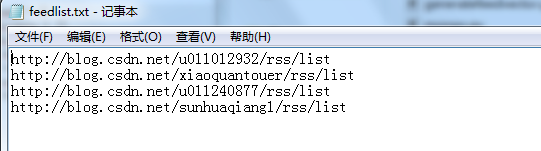

将下列代码加入到feedvector.py 文件的末尾

In [5]:
apcount = { }
wordcounts = { }
feedlist = [line for line in open('feedlist.txt')]
for feedurl in feedlist:
    title , wc = getwordcounts(feedurl)
    wordcounts[title] = wc
    for word,count in wc.items():
        apcount.setdefault(word,0)
        if count>1:
            apcount[word] += 1

下一步，我们来建立一个单词列表，将其实际用于针对每个博客的单词计数。因为像“the”这样的单词几乎到处都是，而像“film-flam”这样的单词则有可能只出现在个别博客中，所以通过只选择介于某个百分比范围内的单词，我们可以减少需要考查的单词总量。在本例中，我们可以将10%定为下届，将50%定为上界，不过加入你发现有过多常见或鲜见的单词出现，不妨尝试一下不同的边界值。

In [6]:
wordlist = []  
for w,bc in apcount.items():  
    frac = float(bc)/len(feedlist)  
    if frac > 0.1 and frac < 0.5:  
        wordlist.append(w)  

最后，我们利用上述单词列表和博客列表来建立一个文本文件，其中包含一个大的矩阵，记录着针对每个博客的所有单词的统计情况：

In [7]:
out = file('blogdata.txt', 'w')  
out.write('Blog')  
for word in wordlist:  
    out.write('\t%s' % word)  
out.write('\n')

for blog, wc in wordcounts.items():  
    out.write(blog)  
    for word in wordlist:  
        if word in wc:  
            out.write('\t%d' % wc[word])  
        else:  
            out.write('\t0')  
    out.write('\n')  

NameError: name 'file' is not defined

这一过程最终将会生成一个名为blogdata.txt 的输出文件。如下所示：

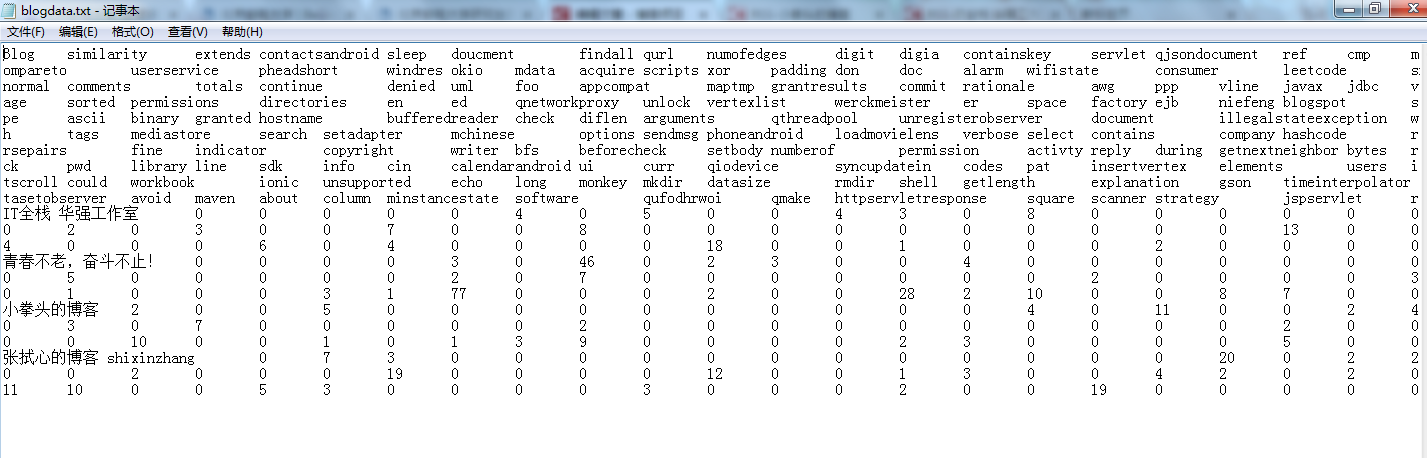

验证一下，是否包含一个以制表符分割的表格，其中的每一列对应一个单词，每一行对应一个博客。本章中出现的函数都将统一采用这一文件格式，日后我们还可以据此来构造新的数据集，我们甚至还可以将一个电子表格另存为如此格式的文本文件，并沿用本章中的算法对其实施聚类。

 四、分级聚类

分级聚类通过连续不断地将最为相似的群组两两合并，来构造出一个群组的层级结构。其中的每个群组都是从单一元素开始的，在本章的例子中，这个单一元素就是博客。在每次迭代的过程中，分级聚类算法会计算每两个群组间的距离，并将距离最近的两个群组合并成一个新的群组。这一过程会一直重复下去，直到只剩一个群组为止。如下图所示：

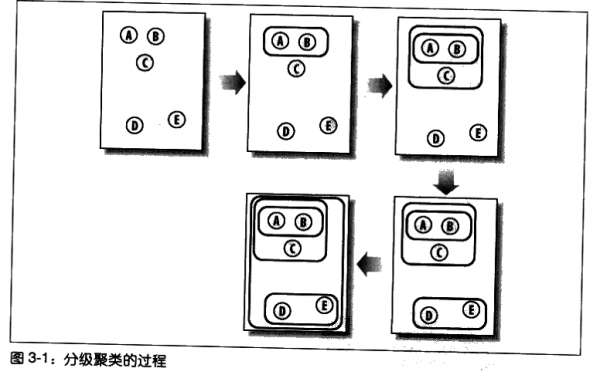

 在上图中，元素的相似程度是通过它们的相对位置来体现的---两个元素距离越近，它们就越相似。开始时，群组还只有一个元素。在第二步中，我们可以看到A和B，这两个紧靠在一起的元素，已经合并成了一个新的群组，新群组所在的位置位于这两个元素的中间。在第三步中，新群组又与C进行了合并。因为D和E现在是距离最近的两个元素，所以它们共同构成了一个新的群组。最后一步将剩下的两个群组合并到了一起。

通常，待分级聚类完成之后，我们可以采用一种图形化的方式来展现所得的结果，这种图被称为树状图，图中显示了按层级排列的节点。上述例子中的树状图如下图所示：

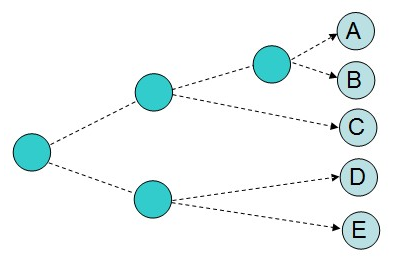

 树状图是分级聚类的一种可视化形式

树状图不仅可以利用连线来表达每个聚类的构成情况，而且还可以利用距离来体现构成聚类的各元素间相隔的远近。在图中，聚类AB与A和B之间的距离要比聚类DE与D和E之间的距离更加接近。这种图形绘制方式能够帮助我们有效地确定一个聚类中各元素间的相似程度，并以此来指示聚类的紧密程度。


本节我们将示范如何对博客数据集进行聚类，以构造博客的层级结构；如果构造成功，我们将实现将主题对博客进行分组。首先，我们需要一个方法来加载数据文件。请新建一个名为clusters.py的文件，将下列函数加入其中：

In [39]:
def readfile(filename):
    lines = [line for line in open(filename)]
    
    # 第一行是列标题
    clonames = lines[0].strip().split('\t')[1:]
    rownames = []
    data = []
    for line in lines[1:]:
        p = line.strip().split('\t')
        ## 每行的第一列是行名
        rownames.append(p[0])
        # 剩余部分就是该行对应的数据 
        data.append([float(x) for x in p[1:]])
    return rownames,clonames,data


from math import sqrt
#皮尔逊相关度
def pearson(v1,v2):
    #简单求和
    sum1 = sum(v1)
    sum2 = sum(v2)
    
    # 求平方和
    sum1Sq = sum([pow(v,2) for v in v1])
    sum2Sq = sum([pow(v,2) for v in v2])
    
    #求乘积之和
    pSum = sum([v1[i]*v2[i] for i in range(len(v1))])
    
    #计算r(Pearson score) 
    num = pSum-(sum1*sum2/len(v1))  
    den = sqrt((sum1Sq-pow(sum1, 2)/len(v1))*(sum2Sq-pow(sum2, 2)/len(v1)))  
    if den == 0:  
        return 0  
    return 1.0-num/den 

class bicluster(object):
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left = left
        self.right = right
        self.vec = vec
        self.id = id
        self.distance = distance

def hcluster(rows,distance=pearson):
    distances = {}
    currentclustid = -1
    
    #最开始的聚类就是数据集中的行
    clust = [bicluster(rows[i],id=i) for i in range(len(rows))]
    
    while len(clust) > 1:
        lowestpair = (0,1)
        closest = distance(clust[0].vec,clust[1].vec)
        
        #遍历遍历每一个配对，寻找最小距离
        for i in range(len(clust)):
            for j in range(i+1,len(clust)):
                if (clust[i].id,clust[j].id) not in distances:
                    distances[(clust[i].id,clust[j].id)] = distance(clust[i].vec,clust[j].vec)
                
                d = distances[(clust[i].id,clust[j].id)]
                
                if d<closest:
                    closest=d
                    lowestpair = (i,j)
                    
        #计算两个聚类的平均值
        mergevec = [
            (clust[lowestpair[0]].vec[i] + clust[lowestpair[1]].vec[i])/2.0
            for i in range(len(clust[0].vec))]
        
        #建立新的聚类
        newcluster = bicluster(mergevec,left = clust[lowestpair[0]],
                              right = clust[lowestpair[1]],
                              distance = closest,id = currentclustid)
        
        # 不在原始集合中的聚类，其id为负数
        currentclustid -= 1
        
        del clust[lowestpair[1]]
        del clust[lowestpair[0]]
        clust.append(newcluster)
        
    return clust[0] 

def printclust(clust, labels=None, n=0):  
    # 利用缩进去来建立层级布局  
    for i in range(n):  
        print (' ',) 
    if clust.id < 0:  
        # 负数标记代表这是一个分支  
        print ('-')  
    else:  
        # 正数标记代表这是一个叶节点  
        if labels==None:  
            print (clust.id)  
        else:  
            print (labels[clust.id])  
    # 现在开始打印右侧分支和左侧分支  
    if clust.left != None:  
        printclust(clust.left, labels=labels, n=n+1)  
    if clust.right != None:  
        printclust(clust.right, labels=labels, n=n+1) 
        
def scaledown(data,distance=pearson,rate=0.01):
    n=len(data)
    
    #每一对数据项之间的由相似度计算出来的空间正确距离  
    #当然计算出来是一个二维数组，关键是为什么第一for循环就用n，第二个for循环就用（0,n）我觉得没区别吧 
    realdist = [[distance(data[i],data[j]) for j in range(n)]
                   for i in range(0,n)]
    outersum = 0.0
    
    
    #随机初始化节点在二维空间中的起始位置,一共有n个节点，所有loc是一个二维坐标数组，有n个（x,y）的形式  
    loc = [[random.random(),random.random()] for i in range(n)]
    #用fakedist装初始位置的时候，各个节点之间的差距
    fakedist = [[0.0 for j in range(n)] for i in range(n)]
    
    lasterror = None
    for m in range(0,1000):#最多循环1000次
        #寻找投影后的距离
        for i in range(n):
            for j in range(n):
                #算的就是i和j之间的距离。这里是取了i节点的(x,y)和j节点的(x,y) 
                fakedist[i][j]=sqrt(sum([pow(loc[i][x]-loc[j][x],2)
                                       for x in range(len(loc[i]))]))
                
        #移动节点
        grad = [[0.0,0.0] for i in range(n)]
        
        totalerror = 0
        for k in range(n):
            for j in range(n):
                if j==k: continue
                #误差值等于目标距离与当前距离之间的差值的百分比  
                #误差值算出来可以是负的，也可以是正的，如果是负的就是远离  
                errorterm = (fakedist[j][k]-realdist[j][k])/realdist[j][k]
                
                #每个节点都要根据误差的多少，按比例移离或者移向其他节点  
                #[k][0]代码x坐标，[k][1]代表y坐标 ，下面求的是需要移动的距离
                grad[k][0] += ((loc[k][0] - loc[j][0])/fakedist[j][k])*errorterm
                grad[k][1] += ((loc[k][1] - loc[j][1])/fakedist[j][k])*errorterm
                
                #记录总的误差数值
                totalerror += abs(errorterm)
        print(totalerror)
        
        #如果节点移动之后的情况变得更坏，那么就结束循环 
        if lasterror and lasterror<totalerror: break
        lasterror = totalerror
        
        #根据rate参数和grad值相乘，移动每一个节点
        for k in range(n):
            loc[k][0] -= rate*grad[k][0]
            loc[k][1] -= rate*grad[k][1]
    return loc

def draw2d(data,labels,jpeg='mds2d.jpg'):
    img=Image.new('RGB',(800,800),(255,255,255))  
    draw=ImageDraw.Draw(img)  
    for i in range(len(data)):  
        x=(data[i][0]+0.5)*400#为什么画布的大小为800，为什么x,y要乘以400  
        y=(data[i][1]+0.5)*400#实际上是实践得出来的，因为返回来的数都是-0.5到1.3之间，所有800的画布和乘以400比较合适，加0.5只是为了让图像尽可能的居中  
        draw.text((x,y),labels[i],(0,0,0))  
    img.show()  
    img.save(jpeg,'JPEG')  



上述函数将数据集中的头一行数据读入了一个代表列名的列表，并将最左边一列读入了一个代表行名的列表，最后它又将剩下的所有数据都放入了一个大列表，其中的每一项对应于数据集中的一行数据。数据集中任一单元格内的计数值，都可以由一个行号和列号来唯一定位，此行号和列号同时还对应于列表rownames和colnames中的索引。


下一步我们来定义紧密度。我们曾在第二章讨论过这个问题，那一章中我们以欧几里德距离和皮尔逊相关度为例对两位影评者的相似程度进行了评论。在本章的例子中，一些博客比其他博客包含更多的文章条目，或者文章条目的长度比其他博客的更长，这样会导致这些博客在总体上比其他博客包含更多的词汇。皮尔逊相关度可以纠正这一问题，因为它判断的其实是两组数据与某条直线的拟合程度。此处，皮尔逊相关度的计算代码将接受两个数字列表作为参数，并返回这两个列表的相关度分值：

In [10]:
from math import sqrt
#皮尔逊相关度
def pearson(v1,v2):
    #简单求和
    sum1 = sum(v1)
    sum2 = sum(v2)
    
    # 求平方和
    sumsq1 = sum([pow(v,2) for v in v1])
    sumsq2 = sum([pow(v,2) for v in v2])
    
    #求乘积之和
    pSum = sum([v1[i]*v2[i] for i in range(len(v1))])
    
    #计算r(Pearson score) 
    num = pSum-(sum1*sum2/len(v1))  
    den = sqrt((sum1Sq-pow(sum1, 2)/len(v1))*(sum2Sq-pow(sum2, 2)/len(v1)))  
    if den == 0:  
        return 0  
    return 1.0-num/den  

请记住皮尔逊相关度的计算结构在两者完全匹配的情况下为1.0， 而在两者毫无关系的情况下则为0.0。上述代码的最后一行，返回的是以1.0 减去皮尔逊相关度之后的结果，这样做的目的是为了让相似度越大的两个元素之间的距离变得更小。


分级聚类算法中的每一个聚类，可以是树种的枝节点，也可以是与数据集中实际数据行相对应的叶节点（在本例中，即为一个博客）。每一个聚类还包含了指示其位置的信息，这一信息可以是来自叶节点的行数据，也可以是来自枝节点的经合并后的数据。我们可以新建一个bicluster类，将所有这些属性存放其中，并以此来描述这棵层级树。在cluster.py中新建一个类，以代表“聚类”这一类型

In [11]:
class bicluster(object):
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left = left
        self.right = right
        self.vec = vec
        self.id = id
        self.distance = distance

分级聚类算法以一组对应于原始数据项的聚类开始。函数的主循环部分会尝试每一组可能的配对并计算它们的相关度，以此来找出最佳配对。最佳配对的两个聚类会被合并成一个新的聚类。新生成的聚类中所包含的数据，等于将两个旧聚类的数据求均值之后得到的结果。这一过程会一直重复下去，直到只剩下一个聚类为止。由于整个计算过程可能会非常耗时，所以不妨将每个配对的相关度计算结果保存起来，因为这样的计算会反复发生，直到配对中的某一项被合并到另一个聚类中为止。

将hcluster算法加入clusters.py 文件中：

In [12]:
def hcluster(rows,distance=pearson):
    distances = {}
    currentclustid = 1
    
    #最开始的聚类就是数据集中的行
    clust = [bicluster(rows[i],id=i) for i in range(len(rows))]
    
    while len(clust) > 1:
        lowestpair = (0,1)
        closest = distance(clust[0].vec,clust[1].vec)
        
        #遍历遍历每一个配对，寻找最小距离
        for i in range(len(clust)):
            for j in range(i+1,len(clust)):
                if (clust[i].id,clust[j].id) not in distances:
                    distances[(clust[i].id,clust[j].id)] = distance(clust[i].vec,clust[j].vec)
                
                d = distances[(clust[i].vec,clust[j].id)]
                
                if d<closest:
                    closest=d
                    lowestpair = (i,j)
                    
        #计算两个聚类的平均值
        mergevec = [
            (clust[lowestpair[0]].vec[i] + clust[lowestpair[1]].vec[i])/2.0
            for i in range(len(clust[0].vec))]
        
        #建立新的聚类
        newcluster = bicluster(mergevec,left = clust[lowestpair[0]],
                              right = clust[lowestpair[1]],
                              distance = closest,id = currentclustid)
        
        # 不在原始集合中的聚类，其id为负数
        currentclustid -= 1
        
        del clust[lowestpair[1]]
        del clust[lowestpair[0]]
        clust.append(newcluster)
        
    return clust[0]  

In [18]:
blogname,words,data = readfile('blogdata.txt')
clust = hcluster(data)

执行过程也许会花费一些时间。将距离值保存起来可以极大地加快执行速度，但是对于算法而言，计算每一对博客的相关度仍然是必要的。为了加快这一过程，我们可借助外部库来计算距离值。为了检视执行的结果，我们可以编写一个简单的函数，递归遍历聚类树，并将其以类似文件系统层级结果的形式打印出来。将printclust函数添加到clusters.py 中：

In [16]:

def printclust(clust, labels=None, n=0):  
    # 利用缩进去来建立层级布局  
    for i in range(n):  
        print(' ', ) 
    if clust.id < 0:  
        # 负数标记代表这是一个分支  
        print('-' ) 
    else:  
        # 正数标记代表这是一个叶节点  
        if labels==None:  
            print(clust.id) 
        else:  
            print labels[clust.id]  
    # 现在开始打印右侧分支和左侧分支  
    if clust.left != None:  
        printclust(clust.left, labels=labels, n=n+1)  
    if clust.right != None:  
        printclust(clust.right, labels=labels, n=n+1)  

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-16-d835bdba5fe8>, line 14)

In [19]:
printclust(clust,labels=blogname)

-
 
gapingvoid: "cartoons drawn on the back of business cards"
 
-
 
 
-
 
 
 
Schneier on Security
 
 
 
Instapundit.com
 
 
-
 
 
 
The Blotter
 
 
 
-
 
 
 
 
-
 
 
 
 
 
MetaFilter
 
 
 
 
 
-
 
 
 
 
 
 
SpikedHumor
 
 
 
 
 
 
-
 
 
 
 
 
 
 
Captain's Quarters
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
Michelle Malkin
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
NewsBusters.org - Exposing Liberal Media Bias
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
Hot Air
 
 
 
 
 
 
 
 
 
 
 
 
Crooks and Liars
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
Power Line
 
 
 
 
 
 
 
 
 
 
 
 
Think Progress
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
Andrew Sullivan | The Daily Dish
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
Little Green Footballs
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
Eschaton
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
Talking Points Memo: by Joshua Micah Marshall
 
 
 
 
 
 
 
 
 
 
 
 
 
Daily Kos
 
 
 
 
-
 
 
 
 
 
43 Folders
 

这样的输出结果看起来不是非常的美观，并且对于读取博客列表这样的大数据集而言，这样做法会比较困难，不过它确实为我们提供了一个有关聚类算法是否工作良好的大体感觉。在下一节，我们将会看到如何建立一个图形版本的聚类树，这棵树更容易阅读，而且能够按比例缩放，从而可以显示出每个聚类的整体布局。 
    五、绘制树状图

使用本书给的blogdata.txt来绘制树状图，代码如下：


In [31]:
from PIL import Image,ImageDraw
def getheight(clust):  
    # 这是一个叶节点吗？若是，则高度为1  
    if clust.left==None and clust.right==None:  
        return 1  

    # 否则，高度为每个分支的高度之和  
    return getheight(clust.left)+getheight(clust.right)  


def getdepth(clust):  
    # 一个叶节点的距离是0.0  
    if clust.left==None and clust.right==None:  
        return 0  
    # 一个枝节点的距离等于左右两侧分支中距离较大者  
    # 加上该枝节点自身的距离  
    return max(getdepth(clust.left), getdepth(clust.right))+clust.distance  

def drawdendrogram(clust, labels, jpeg='clusters.jpg'):  
    # 高度和宽度  
    h = getheight(clust)*20  
    w = 1200  
    depth = getdepth(clust)  

    # 由于宽度是固定的，因此我们需要对距离值做相应的调整  
    scaling = float(w-150)/depth  

    # 新建一个白色背景的图片  
    img = Image.new('RGB', (w, h), (255, 255, 255))  
    draw = ImageDraw.Draw(img)  

    draw.line((0, h/2, 10, h/2), fill=(255, 0, 0))  

    # 画第一个节点  
    drawnode(draw, clust, 10, (h/2), scaling, labels)  
    img.save(jpeg, 'JPEG')  

def drawnode(draw, clust, x, y, scaling, labels):  
    if clust.id<0:  
        h1 = getheight(clust.left)*20  
        h2 = getheight(clust.right)*20  
        top = y-(h1+h2)/2  
        bottom = y+(h1+h2)/2  
        # 线的长度  
        l1 = clust.distance*scaling  
        # 聚类到其子节点的垂直线  
        draw.line((x, top+h1/2, x, bottom-h2/2), fill=(255, 0, 0))  

        # 连接左侧节点的水平线  
        draw.line((x, top+h1/2, x+l1, top+h1/2), fill=(255, 0, 0))  

        # 连接右侧节点的水平线  
        draw.line((x, bottom-h2/2, x+l1, bottom-h2/2), fill=(255, 0, 0))  

        # 调用函数绘制左右节点  
        drawnode(draw, clust.left, x+l1, top+h1/2, scaling, labels)  
        drawnode(draw, clust.right, x+l1, bottom-h2/2, scaling, labels)  
    else:  
        # 如果这是一个叶节点，则绘制节点的标签  
        draw.text((x+5, y-7), labels[clust.id], (0, 0, 0))  


In [32]:
%matplotlib inline
drawdendrogram(clust,blognames,jpeg='blogclust.jpg')
#需要安装PIL包  

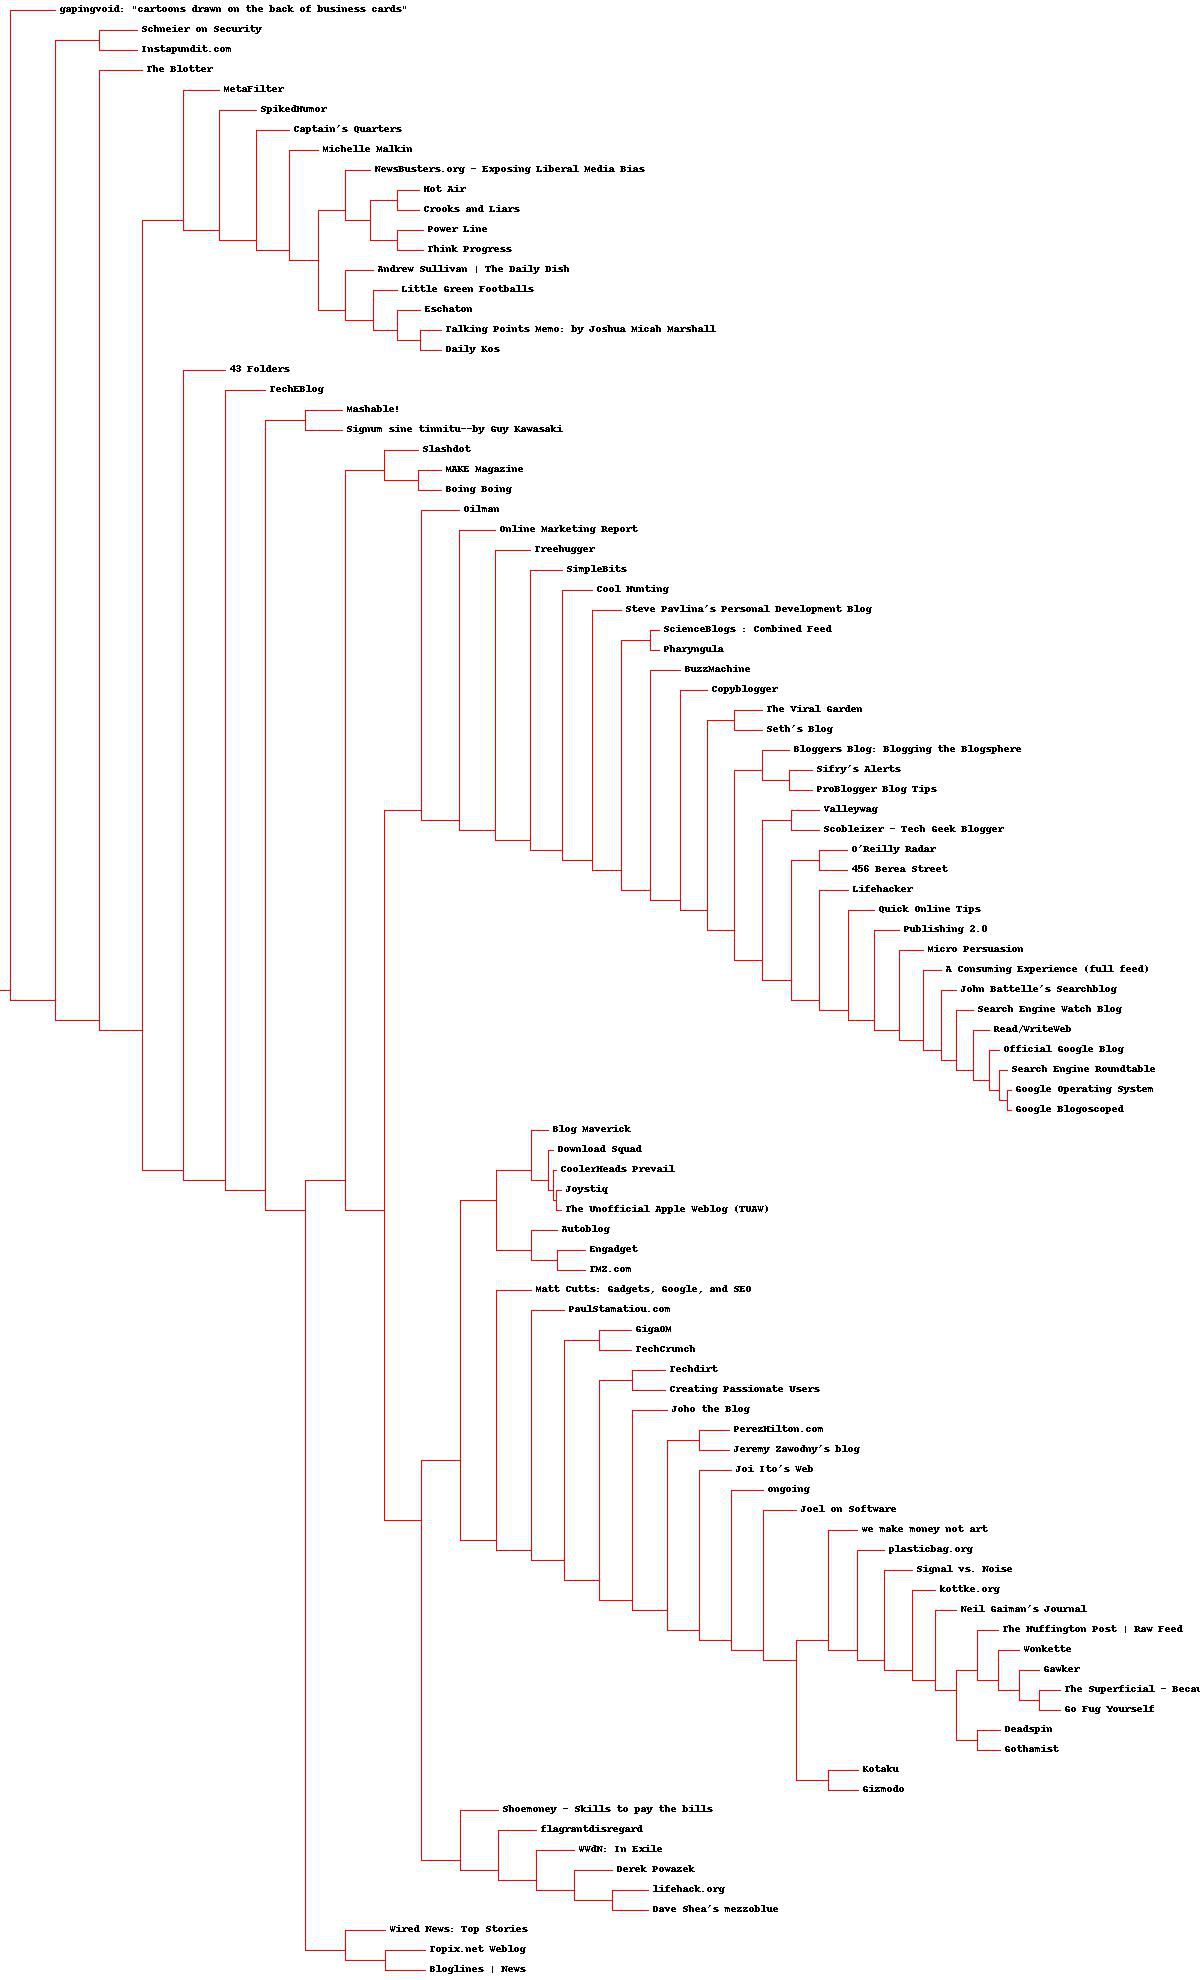

In [33]:
img = Image.open('blogclust.jpg')
img

什么是列聚类？

对博客数据使用了分级聚类的方式分析，我们可以又学的一种聚类方式：列聚类。刚刚的分级聚类就是对行进行了一个聚类。行是什么？行就是一个又一个的博客名，列是什么？列就是一个又一个的单词，那么进行行聚类的时候，我们是根据单词的词频将不同的博客聚了一次类。当我们对单词进行聚类的时候，我们就称之为列聚类。


意义何在

正面回答，我们知道了哪些单词会时常一起使用。对于这个列子来讲，似乎没什么意义。
但是如何行是消费者，列是购买的物品，那么每一行将是某位客户购买某一个商品的数量的列表数组，此时，如果去统计购买的物品的聚类，就非常有意义了。曾经有一个尿布与啤酒的故事，这两个毫无关系的商品居然销售量居然有着正相关的关系。后来发现是父亲来买尿布的时候往往会就会为自己买上一点啤酒，很显然这非常有意义，可以进行捆绑销售。在货物的摆放方面也更加有意义。


博客的例子
还是沿用之前那个数据集blogdata.txt。实现过程其实非常简单，简直用一句话就能说清：帮行和列做一个对换，然后直接调用之前写的过的函数。就可以产生聚类的结果。

首先是行列对置的函数：

In [83]:
def rotatematrix(data):
    newdata = []
    for i in range(len(data[0])):
        newrow = [data[j][i] for j in range(len(data))]
        newdata.append(newrow)
    return newdata

In [85]:
rdata = rotatematrix(data)
rclust = hcluster(rdata)

In [86]:
printclust(rclust,labels=words)

-
 
-
 
 
links
 
 
-
 
 
 
-
 
 
 
 
full
 
 
 
 
visit
 
 
 
-
 
 
 
 
code
 
 
 
 
-
 
 
 
 
 
-
 
 
 
 
 
 
standard
 
 
 
 
 
 
-
 
 
 
 
 
 
 
rss
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
feeds
 
 
 
 
 
 
 
 
feed
 
 
 
 
 
-
 
 
 
 
 
 
included
 
 
 
 
 
 
-
 
 
 
 
 
 
 
especially
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
title
 
 
 
 
 
 
 
 
 
please
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
click
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
network
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
podcast
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
blogger
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
popular
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
ad
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
ads
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
yahoo
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
digg
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
development
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
books
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
program
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
audio
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
allow
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
able
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
location
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
currently
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
general
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
street
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
plus
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
show
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
red
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
former
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 


 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
weeks
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
past
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
recent
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
level
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
addition
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
events
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
tool
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
note
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
sense
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
apparently
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
action
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 


 
 
 
house
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
o
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
history
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
story
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
heard
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
six
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
five
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
enjoy
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
running
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
isn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
wouldn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
believe
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
bad
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
help
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
taking
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
deal
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
youtube
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
sell
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
download
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
work
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
art
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
always
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
through
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
business
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
question
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
mone

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
great
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
where
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
around
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
game
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
games
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
hit
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
sent
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
list
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
whether
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
global
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
rest
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
comments
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
read
 
 
 
 
 
-
 
 
 
 
 
 
-
 
 
 
 
 
 
 
key
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
strong
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
type
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
print
 
 
 
 
 
 
 
 
 
 
 
check
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
n
 
 
 
 
 
 
 
 
 
r
 
 
 
 
 
 
-
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
san
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
plans
 
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
 
dead
 
 
 
 
 
 
 
 
 
 
 
super
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
white
 
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
 
reports
 
 
 
 
 
 
 
 
 
 
notes
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
includes
 
 
 
 
 
 
 
 
-
 
 
 
 
 
 
 
 
 
flash
 
 
 
 
 
 
 
 


我们可以看到，microsoft/software/windows和pro/mac/apple经常一起使用。相信在读这篇博客的人都知道上面留六个词的含义，当然software为什么会和windows经常一起用，看起来似乎有点不太合理，但是谁知道会不会又是像“尿布和啤酒”一样呢？

当然，并不是说图中所有词的聚类都具有意义，实际上，大多数恐怕都没有意义，或者看不出有什么意义。

分级聚类的缺点

此前学习的分级聚类、与列聚类，有二个缺点：

    计算量大，数据越大运行越缓慢。
    没有确切的将数据分成不同的组，只是形成了树状图。虽然我倒觉得如果写过多的代码这一点还是可以搞定的。

k均值聚类可以应对上述两种缺点，我们会预先告诉算法生成的聚类数量，也就是我要产生几个类。

原理
如下图所示，对于5个数据项和两个聚类

过程是这样的，先随机产生两个聚类点，那么每一个数据项都会离一其中一个最近，那么将其分配给那个聚类。比如，A/B分配了给了上方的点，C/D/E分配给了下方的点。紧着，将聚类点的位置会发生改变，会改变到分配给它的所有数据项的中心位置。然后再进行一次分配，很明显C的距离离上面那一个点变得更近了。所以再将C分配给了上面的聚类点，接着，聚类点的位置再次发生改变。如此一来。当然分配的过程中，没有一个点的分配状况被改变，那么聚类点的位置也不会发生改变。此时，聚类结束。我们产生了两个聚类。

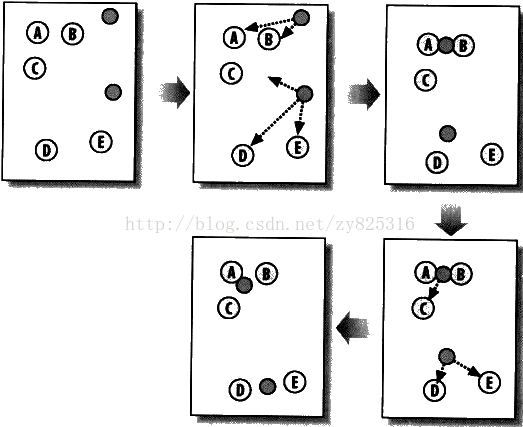

所以与分级聚类相比，其还会接受一个额外的参数，就是希望参数多少个聚类的多少。

k均值聚类的代码  
代码如下：

In [129]:
import random

def kcluster(rows,distance=pearson,k=4):
    #确定每一行的最大值和最小值
    #下面用来创建随机中心点
    ranges = [(min([row[i] for row in rows]),
               max([row[i] for row in rows])) 
              for i in range(len(rows[0]))]
    
    #创建k个聚类点，第一次是随机的,数组列表里面再装了一个数组列表，外层数据列表有4个元素，内层数据列表有和单词数一样多个。  
    #内层数组列表的每一个数值就是最大值到最小值之间的一个数，表示这个聚类点与其他数据点之间的...差距吧，因为如果两者数值一样，那么就离得很近  
    #刚开始这个数值是每一行都加入了，后来将聚类点新的位置的时候，只有这个属于这个类的元素点才算进去，求平均了   
    clusters = [[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                 for i in range(len(rows[0]))] for j in range(k)]
    
    lastmatches = None
    for t in range(100):#迭代次数，这里写的是100次
        print('Iteration %d' %t)
        bestmatches = [[] for i in range(k)]
        
        #在每一行中寻找距离最近的中心点  
        for j in range(len(rows)):#遍历每一个博客
            #从0开始拿到第一个博客的词频，这里是一行一行的拿数据  
            row = rows[j]
            
            #先假设与第0个聚类点最近
            bestmatch = 0
            for i in range(k):#遍历4次个中心点
                d = distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch = i
                    
            #bestmathes里面的键就是4个数组，因为每个数组里面就是数，如果0就代表第一个博客，1就代表第二个博客
            #记录与中心i距离最近的行j
            bestmatches[bestmatch].append(j)
            #print(bestmatches[bestmatch])
            
        #如果迭代的过程中，与上次相同，那么就停止
        if bestmatches == lastmatches:break
        lastmatches = bestmatches
        
        #中心点移动到其所有成员的平均位置处
        for i in range(k):
            avgs = [0.0]*len(rows[0])#构造和单词数量一样多的空列表
            
                        
            if len(bestmatches[i])>0:#说明分类里面有元素
                
                #这个代码提取bestmatches里面的行rowid 
                for rowid in bestmatches[i]:
                    
                    #提取每行里的每一个元素
                    for m in range(len(rows[rowid])):
                        
                        #把存在于rowid的行和m列的数都取出来，列向加总
                        avgs[m] += rows[rowid][m]
                        
                #求一个平均的数值。
                for j in range(len(avgs)):
                    
                    #bestmatches[i]是一个聚类，一个聚类里有多少rowid，就除以多少个rowid，就形成了平均。 
                    avgs[j]/=len(bestmatches[i])
                   
                clusters[i] = avgs
                
                      
    return bestmatches
                 

In [130]:
kclust = kcluster(data,k=10)

Iteration 0
Iteration 1
Iteration 2
Iteration 3


In [131]:
[blognames[r] for r in kclust[0]]

['Publishing 2.0',
 "John Battelle's Searchblog",
 "O'Reilly Radar",
 'Google Operating System',
 'Valleywag',
 'Micro Persuasion',
 'Search Engine Watch Blog',
 'Techdirt',
 'Official Google Blog',
 'Search Engine Roundtable',
 'Shoemoney - Skills to pay the bills',
 'TechCrunch',
 'PaulStamatiou.com',
 'A Consuming Experience (full feed)',
 'Matt Cutts: Gadgets, Google, and SEO',
 'Google Blogoscoped',
 'Read/WriteWeb']

## 多维缩放

原理   

树状图可以展示两个物品之间的相似情况和差距，比如最右边结合的必然是相似度最高的。然而，现在我们要展示一种更为方便的、直观的方式。说白了，就是把所有元素放在一张图上，然后离它近的他们的相似度就高，离的远的相似度就低。
原理：
书上管它叫多维缩放技术，使用这个技术，最终确定了元素怎么放在一张图上。

首先我们用相似度计算方式计算出各个元素之间的相似度（可以理解为博客名）。

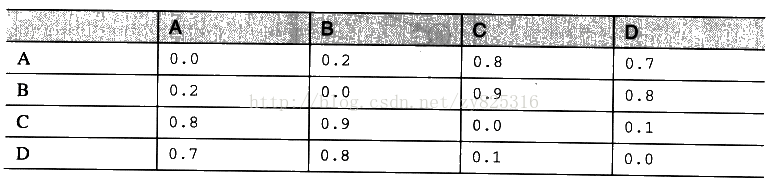

然后我们把这几个元素随机的放在图上：如下图所示`

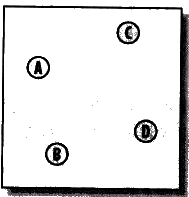

这个几个在图上元素有距离吧？就用差平方之和算，如下图所示

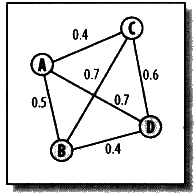

上图距离不对，我们要让它们几个符合相似度的数值，比如A元素，应该离B，近一些，离C、D远一些。所以，对应A元素而已，就有一个受力的情况，然后我们就对A进行移动，使他满足与其他几个元素的相似度的数值。

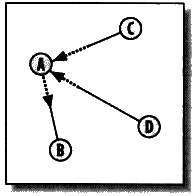

然后反反复复，就可以直到所有的点都无法移动为止。

In [41]:
import random
def scaledown(data,distance=pearson,rate=0.01):
    n=len(data)
    
    #每一对数据项之间的由相似度计算出来的空间正确距离  
    #当然计算出来是一个二维数组，关键是为什么第一for循环就用n，第二个for循环就用（0,n）我觉得没区别吧 
    realdist = [[distance(data[i],data[j]) for j in range(n)]
                   for i in range(0,n)]
    outersum = 0.0
    
    
    #随机初始化节点在二维空间中的起始位置,一共有n个节点，所有loc是一个二维坐标数组，有n个（x,y）的形式  
    loc = [[random.random(),random.random()] for i in range(n)]
    #用fakedist装初始位置的时候，各个节点之间的差距
    fakedist = [[0.0 for j in range(n)] for i in range(n)]
    
    lasterror = None
    for m in range(0,1000):#最多循环1000次
        #寻找投影后的距离
        for i in range(n):
            for j in range(n):
                #算的就是i和j之间的距离。这里是取了i节点的(x,y)和j节点的(x,y) 
                fakedist[i][j]=sqrt(sum([pow(loc[i][x]-loc[j][x],2)
                                       for x in range(len(loc[i]))]))
                
        #移动节点
        grad = [[0.0,0.0] for i in range(n)]
        
        totalerror = 0
        for k in range(n):
            for j in range(n):
                if j==k: continue
                #误差值等于目标距离与当前距离之间的差值的百分比  
                #误差值算出来可以是负的，也可以是正的，如果是负的就是远离  
                errorterm = (fakedist[j][k]-realdist[j][k])/realdist[j][k]
                
                #每个节点都要根据误差的多少，按比例移离或者移向其他节点  
                #[k][0]代码x坐标，[k][1]代表y坐标 ，下面求的是需要移动的距离
                grad[k][0] += ((loc[k][0] - loc[j][0])/fakedist[j][k])*errorterm
                grad[k][1] += ((loc[k][1] - loc[j][1])/fakedist[j][k])*errorterm
                
                #记录总的误差数值
                totalerror += abs(errorterm)
        print(totalerror)
        
        #如果节点移动之后的情况变得更坏，那么就结束循环 
        if lasterror and lasterror<totalerror: break
        lasterror = totalerror
        
        #根据rate参数和grad值相乘，移动每一个节点
        for k in range(n):
            loc[k][0] -= rate*grad[k][0]
            loc[k][1] -= rate*grad[k][1]
    return loc
        

In [42]:
def draw2d(data,labels,jpeg='mds2d.jpg'):
    img=Image.new('RGB',(800,800),(255,255,255))  
    draw=ImageDraw.Draw(img)  
    for i in range(len(data)):  
        x=(data[i][0]+0.5)*400#为什么画布的大小为800，为什么x,y要乘以400  
        y=(data[i][1]+0.5)*400#实际上是实践得出来的，因为返回来的数都是-0.5到1.3之间，所有800的画布和乘以400比较合适，加0.5只是为了让图像尽可能的居中  
        draw.text((x,y),labels[i],(0,0,0))  
    img.show()  
    img.save(jpeg,'JPEG')  

In [43]:
coords=scaledown(data)

4391.986895571221
3508.0032807736234
3426.201707969843
3383.4944755874826
3349.83171018962
3324.2588176957242
3302.6586067424964
3285.439401381415
3270.8059164449887
3257.9558252035326
3245.818435809334
3234.38107337409
3222.724214154407
3212.260781559481
3203.4671420142445
3195.7657942956685
3189.0549067032166
3183.811705732456
3180.2454554483666
3177.546197037308
3174.9928253465287
3172.2379805325713
3169.0804433004846
3165.4557466055635
3161.2847069620398
3156.6252160863974
3151.651142346148
3147.248481373179
3143.6661533755696
3140.185331935095
3136.233139656527
3132.2934290064136
3128.81764898871
3125.654448773888
3122.419153919418
3119.7202432789745
3117.0874519565323
3114.6803826942223
3112.831476532134
3110.991965247665
3109.2965554849347
3107.7398058135586
3106.1333621835493
3104.1913772635075
3101.5644230661
3098.5314019361545
3095.2680830091363
3091.961489995265
3088.924844688454
3086.10714585713
3083.48419329021
3081.1647563892507
3079.1153202521173
3077.2445383784207
3075.

In [44]:
draw2d(coords,blognames,jpeg='blogs2d,.jpg')

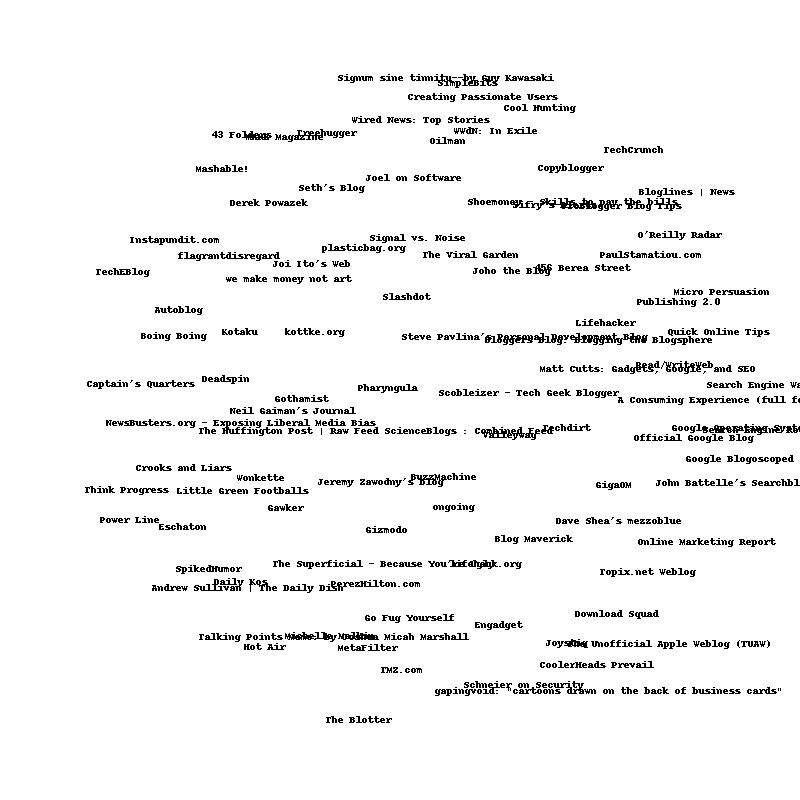

In [45]:
img = Image.open('blogs2d,.jpg')
img